In [ ]:
#importando librerias necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

#importando datos
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Proyecto DSCH/gun_violence'
gun_violence = pd.read_csv('gun_violence_data.csv')

Mounted at /content/gdrive
/content/gdrive/MyDrive/Proyecto DSCH/gun_violence


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
gun_violence=gun_violence.drop(['congressional_district','state_senate_district', 'state_house_district'], axis=1)

In [ ]:
gun_violence['date'] = pd.to_datetime(gun_violence['date'])

In [ ]:
gun_violence['day'] = gun_violence['date'].dt.day
gun_violence['month'] = gun_violence['date'].dt.month
gun_violence['year'] = gun_violence['date'].dt.year
gun_violence['day_of_the_week'] = gun_violence['date'].dt.dayofweek
gun_violence.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,...,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,day,month,year,day_of_the_week
0,92114,2014-01-01,Kentucky,Lexington,0,1,NaN,NaN,Shot - Wounded/Injured,38.0507,...,NaN,NaN,0::Adult 18+,0::Male,0::Injured,0::Victim,1,1,2014,2
1,92117,2014-01-01,Kentucky,Cynthiana,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured||Accidental Shooting||A...,38.4333,...,1.0,1::22,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,1,1,2014,2
2,92119,2014-01-01,Kentucky,Louisville,0,1,NaN,NaN,Shot - Wounded/Injured,38.2501,...,NaN,NaN,0::Adult 18+,0::Male,0::Injured,0::Victim,1,1,2014,2
3,92125,2014-01-01,Oklahoma,Lawton,0,0,NaN,NaN,Shots Fired - No Injuries,34.6347,...,NaN,NaN,0::Adult 18+,0::Male||1::Male,0::Unharmed||1::Unharmed,0::Victim||1::Subject-Suspect,1,1,2014,2
4,92131,2014-01-01,New York,Bronx,0,1,NaN,NaN,Pistol-whipping,40.8179,...,NaN,0::23,0::Adult 18+,0::Male,0::Injured,0::Victim,1,1,2014,2


In [ ]:
gun_violence = gun_violence.drop(gun_violence[gun_violence.year <= 2013].index)
gun_violence = gun_violence.drop(gun_violence[gun_violence.year >= 2018].index)
incident_count_year = gun_violence.groupby(['year'])
incident_count_year['incident_id'].count()

year
2014    40319
2015    42161
2016    44044
2017    47967
Name: incident_id, dtype: int64

In [ ]:
gun_violence.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,day,month,year,day_of_the_week
count,1.744910e+05,174491.000000,174491.000000,174491.000000,174491.000000,96556.000000,174491.000000,174491.000000,174491.000000,174491.000000
mean,5.259179e+05,0.298170,0.549845,37.557316,-89.122126,1.320767,15.773014,6.496289,2015.571141,3.067705
std,2.760692e+05,0.554688,0.739584,5.117924,14.344668,3.282806,8.847433,3.369310,1.121103,2.023375
min,9.211400e+04,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.000000,2014.000000,0.000000
25%,2.927490e+05,0.000000,0.000000,33.904200,-93.278700,1.000000,8.000000,4.000000,2015.000000,1.000000
50%,5.097650e+05,0.000000,0.000000,38.614200,-86.136500,1.000000,16.000000,7.000000,2016.000000,3.000000
75%,7.727455e+05,1.000000,1.000000,41.468500,-79.897700,1.000000,23.000000,9.000000,2017.000000,5.000000
max,1.083162e+06,50.000000,53.000000,71.336800,-67.271100,400.000000,31.000000,12.000000,2017.000000,6.000000


Text(0.5, 1.0, 'Cantidad de muertes por año')

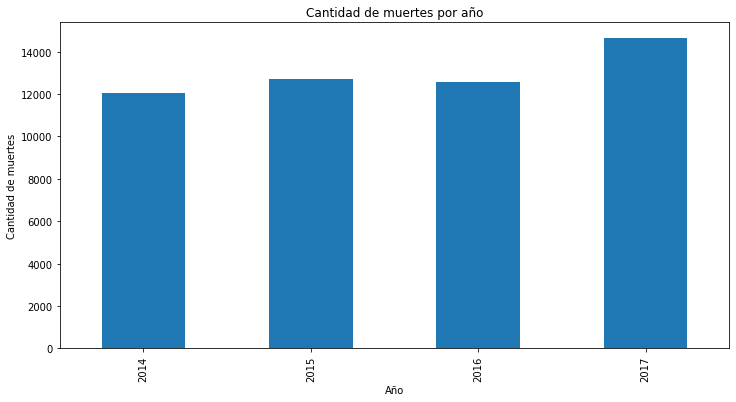

In [ ]:
#muertes por año
gun_violence = gun_violence.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
muertos_año = gun_violence.groupby(['year']).sum()
muertos_año['n_killed'].plot.bar(stacked=True)
plt.xlabel('Año')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes por año')

Text(0.5, 1.0, 'Cantidad de heridos por año')

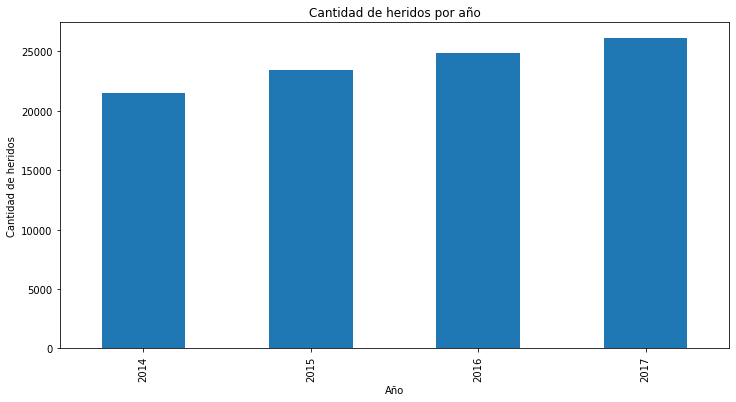

In [ ]:
#heridos por año
gun_violence = gun_violence.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
heridos_año = gun_violence.groupby(['year']).sum()
heridos_año['n_injured'].plot.bar(stacked=True)
plt.xlabel('Año')
plt.ylabel('Cantidad de heridos')
plt.title('Cantidad de heridos por año')

Text(0.5, 1.0, 'Cantidad de muertes por mes')

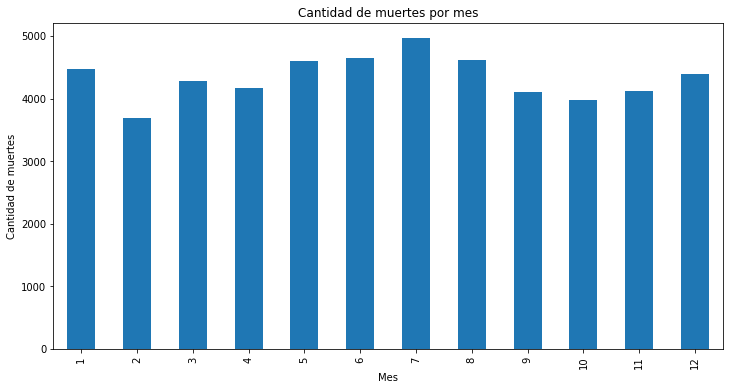

In [ ]:
#muertes por mes
gun_violence = gun_violence.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
muertos_año = gun_violence.groupby(['month']).sum()
muertos_año['n_killed'].plot.bar(stacked=True)
plt.xlabel('Mes')
plt.ylabel('Cantidad de muertes')
plt.title('Cantidad de muertes por mes')

Text(0.5, 1.0, 'Cantidad de heridos por mes')

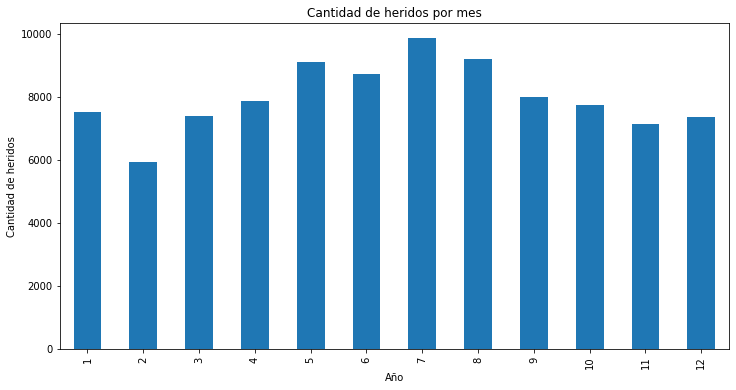

In [ ]:
#heridos por mes
gun_violence = gun_violence.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
heridos_año = gun_violence.groupby(['month']).sum()
heridos_año['n_injured'].plot.bar(stacked=True)
plt.xlabel('Año')
plt.ylabel('Cantidad de heridos')
plt.title('Cantidad de heridos por mes')

In [ ]:
eventos_mes = gun_violence.groupby(['month']).count()
eventos_mes.head(12)

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,day,year,day_of_the_week
month,,,,,,,,,,,,,,,,,,,,
1,14727,14727,14727,14727,14727,14727,7311,7311,14693,14727,14727,7311,10859,14727,14369,14670,14727,14727,14727,14727
2,11922,11922,11922,11922,11922,11922,6314,6314,11907,11922,11922,6314,8901,11922,11614,11862,11922,11922,11922,11922
3,14345,14345,14345,14345,14345,14345,7080,7080,14331,14345,14345,7080,10690,14345,13941,14299,14345,14345,14345,14345
4,14732,14732,14732,14732,14732,14732,7282,7283,14712,14732,14732,7283,10763,14732,14320,14685,14732,14732,14732,14732
5,15798,15798,15798,15798,15798,15798,7636,7637,15781,15798,15798,7637,11630,15798,15407,15761,15798,15798,15798,15798
6,15111,15111,15111,15111,15111,15111,7432,7433,15095,15111,15111,7432,11220,15111,14715,15068,15111,15111,15111,15111
7,16729,16729,16729,16729,16729,16729,8114,8115,16708,16729,16729,8115,12469,16729,16386,16683,16729,16729,16729,16729
8,15874,15874,15874,15874,15874,15874,9518,9519,15853,15874,15874,9519,11963,15874,15497,15809,15874,15874,15874,15874
9,14176,14176,14176,14176,14176,14176,8614,8614,14156,14176,14176,8614,10590,14176,13777,14139,14176,14176,14176,14176


Text(0.5, 1.0, 'Cantidad de eventos por mes')

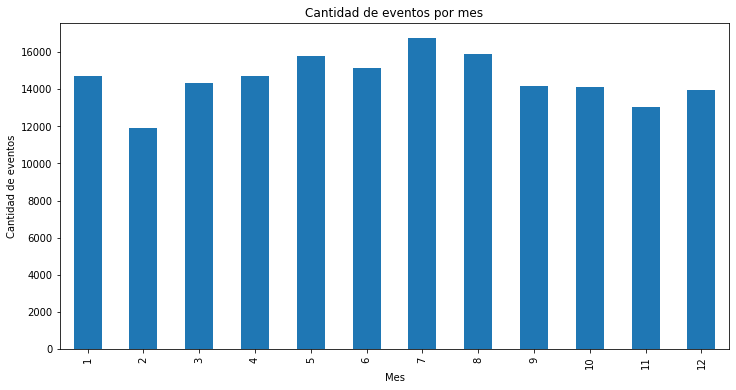

In [ ]:
#incidentes por mes
gun_violence = gun_violence.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
incidentes_mes = gun_violence.groupby(['month']).count()
incidentes_mes['incident_id'].plot.bar(stacked=True)
plt.xlabel('Mes')
plt.ylabel('Cantidad de eventos')
plt.title('Cantidad de eventos por mes')

In [ ]:
eventos_dia_s = gun_violence.groupby(['day_of_the_week']).count()
eventos_dia_s.head(7)

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,day,month,year
day_of_the_week,,,,,,,,,,,,,,,,,,,,
0,24388,24388,24388,24388,24388,24388,13420,13420,24356,24388,24388,13420,18049,24388,23803,24315,24388,24388,24388,24388
1,24150,24150,24150,24150,24150,24150,13602,13603,24116,24150,24150,13603,18044,24150,23550,24079,24150,24150,24150,24150
2,24923,24923,24923,24923,24923,24923,13986,13990,24885,24923,24923,13990,18484,24923,24305,24812,24923,24923,24923,24923
3,23652,23652,23652,23652,23652,23652,13320,13322,23630,23652,23652,13322,17516,23652,23035,23559,23652,23652,23652,23652
4,23709,23709,23709,23709,23709,23709,13236,13238,23685,23709,23709,13238,17635,23709,23062,23639,23709,23709,23709,23709
5,26515,26515,26515,26515,26515,26515,14274,14275,26479,26515,26515,14274,19923,26515,25876,26430,26515,26515,26515,26515
6,27154,27154,27154,27154,27154,27154,14709,14709,27123,27154,27154,14709,20404,27154,26442,27075,27154,27154,27154,27154


Text(0.5, 1.0, 'Cantidad de eventos por día de la semana')

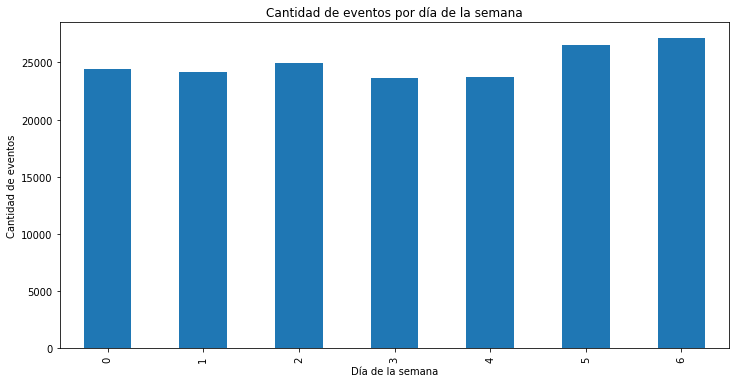

In [ ]:
#incidentes por día de la semana
gun_violence = gun_violence.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
incidentes_dia = gun_violence.groupby(['day_of_the_week']).count()
incidentes_dia['incident_id'].plot.bar(stacked=True)
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de eventos')
plt.title('Cantidad de eventos por día de la semana')

In [ ]:
gun_violence.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,...,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,day,month,year,day_of_the_week
0,92114,2014-01-01,Kentucky,Lexington,0,1,NaN,NaN,Shot - Wounded/Injured,38.0507,...,NaN,NaN,0::Adult 18+,0::Male,0::Injured,0::Victim,1,1,2014,2
1,92117,2014-01-01,Kentucky,Cynthiana,0,1,0::Unknown,0::Unknown,Shot - Wounded/Injured||Accidental Shooting||A...,38.4333,...,1.0,1::22,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,1,1,2014,2
2,92119,2014-01-01,Kentucky,Louisville,0,1,NaN,NaN,Shot - Wounded/Injured,38.2501,...,NaN,NaN,0::Adult 18+,0::Male,0::Injured,0::Victim,1,1,2014,2
3,92125,2014-01-01,Oklahoma,Lawton,0,0,NaN,NaN,Shots Fired - No Injuries,34.6347,...,NaN,NaN,0::Adult 18+,0::Male||1::Male,0::Unharmed||1::Unharmed,0::Victim||1::Subject-Suspect,1,1,2014,2
4,92131,2014-01-01,New York,Bronx,0,1,NaN,NaN,Pistol-whipping,40.8179,...,NaN,0::23,0::Adult 18+,0::Male,0::Injured,0::Victim,1,1,2014,2


In [ ]:
eventos_ciudad = gun_violence.groupby(['city_or_county']).count()
eventos_ciudad = eventos_ciudad.drop(eventos_ciudad[eventos_ciudad.incident_id < 100].index)
eventos_ciudad.describe()


,incident_id,date,state,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,day,month,year,day_of_the_week
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,441.940000,441.940000,441.940000,441.940000,441.940000,231.020000,231.040000,441.304000,441.940000,441.940000,231.036000,323.564000,441.940000,430.096000,440.580000,441.940000,441.940000,441.940000,441.940000,441.940000
std,723.217488,723.217488,723.217488,723.217488,723.217488,391.766061,391.872447,721.402819,723.217488,723.217488,391.819423,640.329457,723.217488,712.457458,721.497035,723.217488,723.217488,723.217488,723.217488,723.217488
min,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,100.000000,100.000000,100.000000,1.000000,51.000000,100.000000,96.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
25%,146.250000,146.250000,146.250000,146.250000,146.250000,85.250000,85.250000,146.000000,146.250000,146.250000,85.250000,106.250000,146.250000,142.000000,145.500000,146.250000,146.250000,146.250000,146.250000,146.250000
50%,245.500000,245.500000,245.500000,245.500000,245.500000,132.000000,132.000000,244.500000,245.500000,245.500000,132.000000,179.500000,245.500000,239.500000,244.500000,245.500000,245.500000,245.500000,245.500000,245.500000
75%,472.250000,472.250000,472.250000,472.250000,472.250000,260.750000,260.750000,472.250000,472.250000,472.250000,260.750000,356.750000,472.250000,461.500000,467.750000,472.250000,472.250000,472.250000,472.250000,472.250000
max,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,5403.000000,5405.000000,9447.000000,9476.000000,9476.000000,5404.000000,9081.000000,9476.000000,9405.000000,9453.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000


Text(0.5, 1.0, 'Cantidad de eventos por ciudad (> a 1000 eventos)')

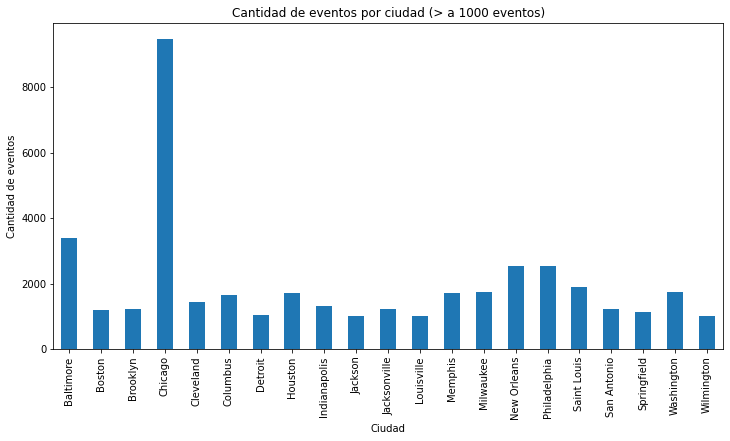

In [ ]:
#incidentes por ciudad
gun_violence = gun_violence.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
eventos_ciudad = gun_violence.groupby(['city_or_county']).count()
eventos_ciudad = eventos_ciudad.drop(eventos_ciudad[eventos_ciudad.incident_id < 1000].index)
eventos_ciudad['incident_id'].plot.bar(stacked=True)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de eventos')
plt.title('Cantidad de eventos por ciudad (> a 1000 eventos)')

Text(0.5, 1.0, 'Cantidad de eventos por estado (> a 5000 eventos')

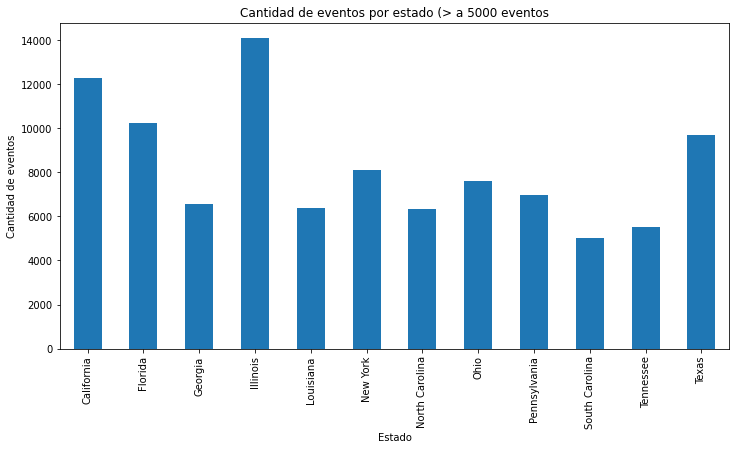

In [ ]:
#incidentes por estado
gun_violence = gun_violence.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
eventos_estado = gun_violence.groupby(['state']).count()
eventos_estado = eventos_estado.drop(eventos_estado[eventos_estado.incident_id < 5000].index)
eventos_estado['incident_id'].plot.bar(stacked=True)
plt.xlabel('Estado')
plt.ylabel('Cantidad de eventos')
plt.title('Cantidad de eventos por estado (> a 5000 eventos')